# Exercise on Numpy and Matplotlib

In [483]:
import numpy as np
import matplotlib.pyplot as plt

## The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with ```np.loadtxt``` and do the following exercises **without for-loops**.

In [484]:
data = np.loadtxt("http://scipy-lectures.org/_downloads/populations.txt", dtype=object, skiprows=1)
data = data.astype('float')

## Plot the populations for the years in the period. Add legend and axis labels to the plot.

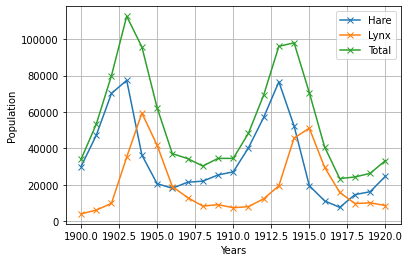

In [485]:
plt.plot(data[:, 0], data[:, 1], '-x', label='Hare')
plt.plot(data[:, 0], data[:, 2], '-x', label='Lynx')
plt.plot(data[:, 0], data[:, 1] + data[:, 2], '-x', label='Total')

plt.xlabel('Years')
plt.ylabel('Population')
plt.legend()
plt.grid()

plt.show()

## Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

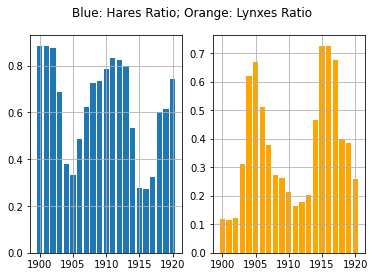

In [486]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Blue: Hares Ratio; Orange: Lynxes Ratio')
axs[0].bar(data[:, 0], data[:, 1]/(data[:, 1] + data[:, 2]))
axs[1].bar(data[:, 0], data[:, 2]/(data[:, 1] + data[:, 2]), color='orange')
axs[0].grid(True)
axs[1].grid(True)
plt.show()

## Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

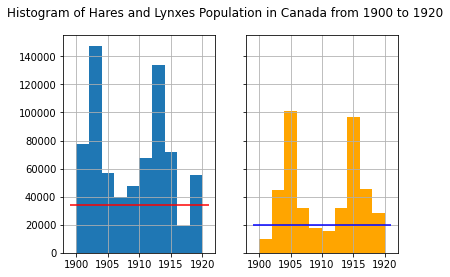

Hare E[X]:   34080.95238095238   Lynx E[X]:   20166.666666666668


In [487]:
import math

def sample_mean(samples):
    return np.mean(samples)

def sample_var(samples):
    m = np.mean(samples)**2
    samples = samples**2
    return (np.mean(samples) - m)*len(samples)/(len(samples)-1)

m_h = sample_mean(data[:, 1])
m_l = sample_mean(data[:, 2])
s_h = math.sqrt(sample_var(data[:, 1]))
s_l = math.sqrt(sample_var(data[:, 2]))

fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle('Histogram of Hares and Lynxes Population in Canada from 1900 to 1920')

axs[0].hist(x=data[:, 0], weights=data[:, 1], label='Hare')
axs[1].hist(x=data[:, 0], weights=data[:, 2], label='Lynx', color="orange")

axs[0].hlines(m_h, 1899, 1921, colors = "red", label = 'Hare Mean')
axs[1].hlines(m_l, 1899, 1921, colors = "blue", label = 'Lynx Mean')

axs[0].grid(True)
axs[1].grid(True)

plt.show()
print("Hare E[X]:  ", m_h, "  Lynx E[X]:  ", m_l)

## Find which year each species had the largest population. Mark these years in the plot of populations.

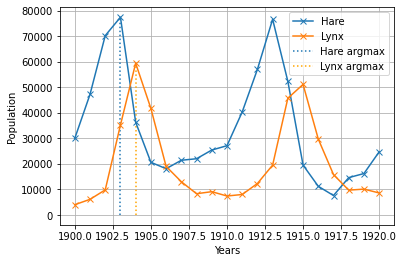

In [488]:
plt.plot(data[:, 0], data[:, 1], '-x', label='Hare')
plt.plot(data[:, 0], data[:, 2], '-x', label='Lynx')

plt.vlines(data[np.argmax(data[:, 1]), 0], 0, data[np.argmax(data[:, 1]), 1], linestyles="dotted", label='Hare argmax')
plt.vlines(data[np.argmax(data[:, 2]), 0], 0, data[np.argmax(data[:, 2]), 2], linestyles="dotted", colors='orange', label='Lynx argmax')

plt.xlabel('Years')
plt.ylabel('Population')
plt.legend()
plt.grid()

plt.show()

## Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


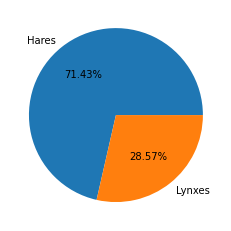

In [489]:
hl = np.where(data[:, 1] - data[:, 2] > 0, 'H', 'L')
print(hl)
animals = ['Hares', 'Lynxes']

pc = np.array([len(np.argwhere(hl == 'H')), len(np.argwhere(hl == 'L'))])

plt.pie(pc, labels=animals, autopct='%1.2f%%')
plt.show()

## Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

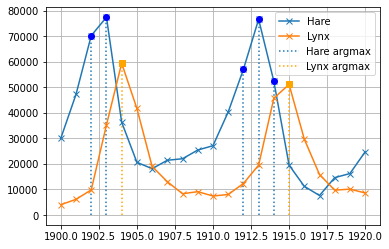

In [490]:
hyears_ind = np.where(data[:, 1] > 50000)[0]
lyears_ind = np.where(data[:, 2] > 50000)[0]

plt.plot(data[:, 0], data[:, 1], '-x', label='Hare')
plt.plot(data[:, 0], data[:, 2], '-x', label='Lynx')

plt.plot(data[hyears_ind, 0], data[hyears_ind, 1], 'bo')
plt.plot(data[lyears_ind, 0], data[lyears_ind, 2], 's', color='orange')

plt.vlines(data[hyears_ind, 0], 0, data[hyears_ind, 1], linestyles="dotted", label='Hare argmax')
plt.vlines(data[lyears_ind, 0], 0, data[lyears_ind, 2], linestyles="dotted", colors='orange', label='Lynx argmax')

plt.legend()
plt.grid()
plt.show()

## Find the top 2 years for each species when they had the lowest populations.

In [491]:
h_minpop = np.argsort(data[:, 1], axis=0, kind='quicksort')
l_minpop = np.argsort(data[:, 2], axis=0, kind='quicksort')

print("Top1 Hares: ", data[h_minpop[0], 0], "    Top2 Hares: ", data[h_minpop[1], 0])
print("Top1 Lynxs: ", data[l_minpop[0], 0], "    Top2 Lynxs: ", data[l_minpop[1], 0])

Top1 Hares:  1917.0     Top2 Hares:  1916.0
Top1 Lynxs:  1900.0     Top2 Lynxs:  1901.0


## Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

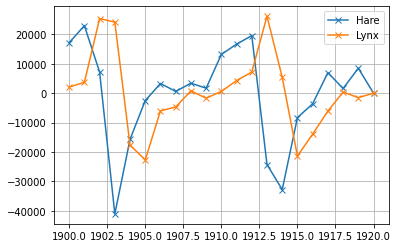

Correlation coefficient:    -0.1780243032713659


In [492]:
data_change = data.copy()
data_change[:, 1] = np.append(np.diff(data[:, 1]), 0)
data_change[:, 2] = np.append(np.diff(data[:, 2]), 0)
data_change[:, 3] = np.append(np.diff(data[:, 3]), 0)

plt.plot(data_change[:, 0], data_change[:, 1], '-x', label='Hare')
plt.plot(data_change[:, 0], data_change[:, 2], '-x', label='Lynx')

plt.legend()
plt.grid()
plt.show()

print("Correlation coefficient:   ", np.corrcoef(data_change[:, 1], data_change[:, 2])[0, 1])

## Show population of hares vs carrots and hares vs lynxes.

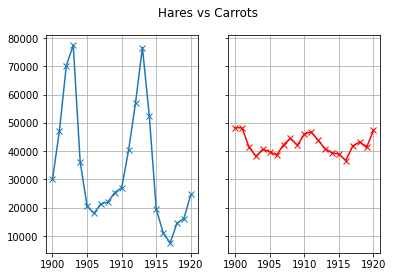

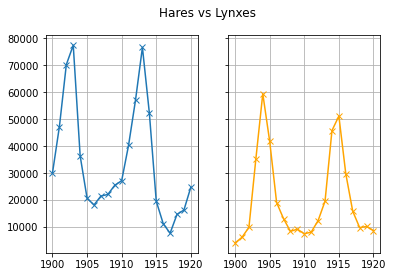

In [493]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle('Hares vs Carrots')

axs[0].plot(data[:, 0], data[:, 1], '-x', label='Hare')
axs[1].plot(data[:, 0], data[:, 3], '-x', label='Carrot', color="red")

axs[0].grid(True)
axs[1].grid(True)

plt.show()

fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle('Hares vs Lynxes')

axs[0].plot(data[:, 0], data[:, 1], '-x', label='Hare')
axs[1].plot(data[:, 0], data[:, 2], '-x', label='Lynxes', color="orange")

axs[0].grid(True)
axs[1].grid(True)

plt.show()

## Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

Let us create a new array without 1920 data:

In [494]:
datacop = np.empty(len(data)-1)
datacop = data[:-1]
datadifcop = np.empty(len(data_change)-1)
datadifcop = data_change[:-1]

### Method 1. Polynomial approximation

Counting amount of extrema on hares plot:   4

Using $P \in \mathbb{R}[x]: \deg P = d, \quad d = 1, \dots, 5$

Start Period is $1919-(d+1)$ for nessessary data to be complete 

In [495]:
d = 1
start = 19-d-1
coefs = np.polyfit(datacop[start:, 0], datacop[start:, 1], d)
print(coefs)

x = np.ones(d+1)
for i in range(d-1, -1, -1):
    x[i] = 1920*x[i+1]

linear = np.sum(coefs*x)
print("Estimated value:  ", linear, "\nHistorical Value: ", data[len(data)-1, 1])
print("Eps = ", abs(linear/data[len(data)-1, 1] -1) )

[ 4.3000e+03 -8.2346e+06]
Estimated value:   21400.000000002794 
Historical Value:  24700.0
Eps =  0.13360323886628367


In [496]:
d = 2
start = 19-d-1
coefs = np.polyfit(datacop[start:, 0], datacop[start:, 1], d)
print(coefs)

x = np.ones(d+1)
for i in range(d-1, -1, -1):
    x[i] = 1920*x[i+1]

linear = np.sum(coefs*x)
print("Estimated value:  ", linear, "\nHistorical Value: ", data[len(data)-1, 1])
print("Eps = ", abs(linear/data[len(data)-1, 1] -1) )

[ 1.3000000e+03 -4.9833000e+06  4.7756404e+09]
Estimated value:   24400.00000190735 
Historical Value:  24700.0
Eps =  0.012145748910633691


In [497]:
d = 3
start = 19-d-1
coefs = np.polyfit(datacop[start:, 0], datacop[start:, 1], d)
print(coefs)

x = np.ones(d+1)
for i in range(d-1, -1, -1):
    x[i] = 1920*x[i+1]

linear = np.sum(coefs*x)
print("Estimated value:  ", linear, "\nHistorical Value: ", data[len(data)-1, 1])
print("Eps = ", abs(linear/data[len(data)-1, 1] -1) )

[-8.41667045e+02  4.84259861e+06 -9.28742162e+09  5.93731909e+12]
Estimated value:   13919.98828125 
Historical Value:  24700.0
Eps =  0.43643772140688264


In [498]:
d = 4
start = 19-d-1
coefs = np.polyfit(datacop[start:, 0], datacop[start:, 1], d)
print(coefs)

x = np.ones(d+1)
for i in range(d-1, -1, -1):
    x[i] = 1920*x[i+1]

linear = np.sum(coefs*x)
print("Estimated value:  ", linear, "\nHistorical Value: ", data[len(data)-1, 1])
print("Eps = ", abs(linear/data[len(data)-1, 1] -1) )

[ 7.91318782e+01 -6.07845302e+05  1.75091503e+09 -2.24157725e+12
  1.07614990e+15]
Estimated value:   14166.25 
Historical Value:  24700.0
Eps =  0.4264676113360324


In [499]:
d = 5
start = 19-d-1
coefs = np.polyfit(datacop[start:, 0], datacop[start:, 1], d)
print(coefs)

x = np.ones(d+1)
for i in range(d-1, -1, -1):
    x[i] = 1920*x[i+1]

linear = np.sum(coefs*x)
print("Estimated value:  ", linear, "\nHistorical Value: ", data[len(data)-1, 1])
print("Eps = ", abs(linear/data[len(data)-1, 1] -1) )

[-9.44650580e-02  5.42927913e+02 -6.93433219e+05 -1.32842132e+09
  3.81750841e+12 -2.43784906e+15]
Estimated value:   -13599.5 
Historical Value:  24700.0
Eps =  1.550587044534413


C:\Users\sazon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


__Appears that quadratic approximation starting from 1917 was the most efficient__

### Method 2. Approximating the difference with same method

$d = 1, 2, 3$

Start is at $1919 - d$ since this method needs less numbers

In [500]:
d = 1
start = 19-d
coefs = np.polyfit(datadifcop[start:, 0], datadifcop[start:, 1], d)
print(coefs)

x = np.ones(d+1)
for i in range(d-1, -1, -1):
    x[i] = 1920*x[i+1]

linear = np.sum(coefs*x)+1919
print("Estimated value:  ", linear, "\nHistorical Value: ", data[len(data)-1, 1])
print("Eps = ", abs(linear/data[len(data)-1, 1] -1) )

[ 6.90000e+03 -1.32326e+07]
Estimated value:   17318.999999998137 
Historical Value:  24700.0
Eps =  0.29882591093124955


In [501]:
d = 2
start = 19-d
coefs = np.polyfit(datadifcop[start:, 0], datadifcop[start:, 1], d)
print(coefs)

x = np.ones(d+1)
for i in range(d-1, -1, -1):
    x[i] = 1920*x[i+1]

linear = np.sum(coefs*x)+1919
print("Estimated value:  ", linear, "\nHistorical Value: ", data[len(data)-1, 1])
print("Eps = ", abs(linear/data[len(data)-1, 1] -1) )

[ 6.14999999e+03 -2.35906500e+07  2.26227157e+10]
Estimated value:   29618.99995803833 
Historical Value:  24700.0
Eps =  0.19914979587199722


In [502]:
d = 3
start = 19-d
coefs = np.polyfit(datadifcop[start:, 0], datadifcop[start:, 1], d)
print(coefs)

x = np.ones(d+1)
for i in range(d-1, -1, -1):
    x[i] = 1920*x[i+1]

linear = np.sum(coefs*x)+1919
print("Estimated value:  ", linear, "\nHistorical Value: ", data[len(data)-1, 1])
print("Eps = ", abs(linear/data[len(data)-1, 1] -1) )

[ 4.71665415e+03 -2.71334780e+07  5.20302112e+10 -3.32571019e+13]
Estimated value:   57918.7578125 
Historical Value:  24700.0
Eps =  1.3448889802631578


__This method is way less precise__








Method 1, Quadratic Approximation 'wins': 

$Population_{Hares}(1920) = 24400.00 \pm 1.21\% $